In [55]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
%matplotlib inline 

In [57]:
train = pd.read_csv("train_titanic.csv")

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
train.isnull() # harjayi ke True bashad yani maghadir baraye anha Unkown ast yani meghdar nadarad, va baraye baghye maghadir vojod darad

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


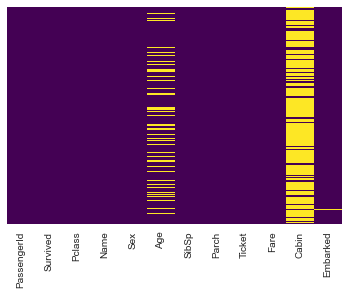

In [34]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis');
# khotote zard be ma neshan midahand satr haye null ra(darvaghe bedoone meghdar ra)

In [7]:
sns.set_style('whitegrid')  #khataye meshki dar background baraye namayeshe behtra ezafe mikonad

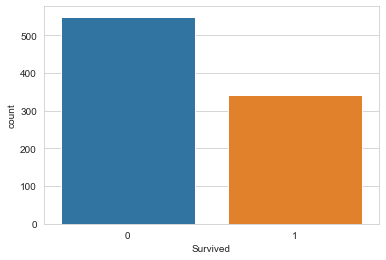

In [8]:
sns.countplot(x='Survived', data = train);

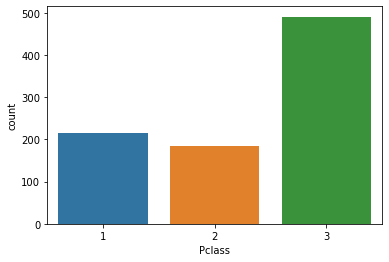

In [48]:
sns.countplot(data=train, x='Pclass');

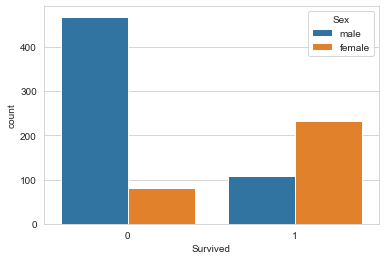

In [9]:
sns.countplot(x='Survived', hue='Sex', data = train);

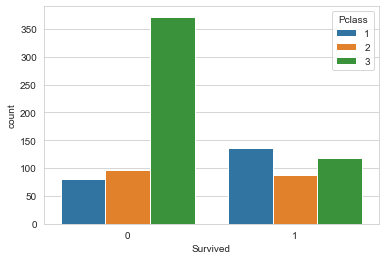

In [10]:
sns.countplot(x='Survived', hue='Pclass', data = train);

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

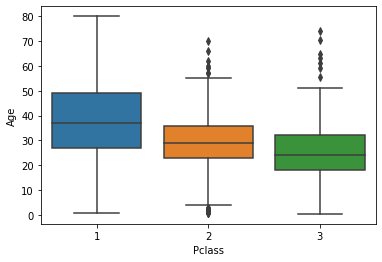

In [54]:
sns.boxplot(x='Pclass', y='Age', data=train)

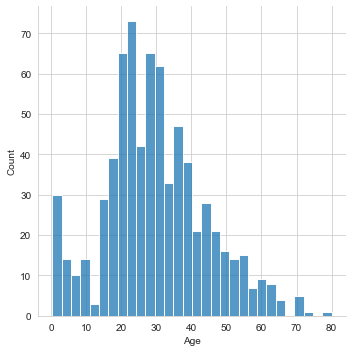

In [11]:
sns.displot(train['Age'].dropna(),kde=False, bins=30);

<AxesSubplot:>

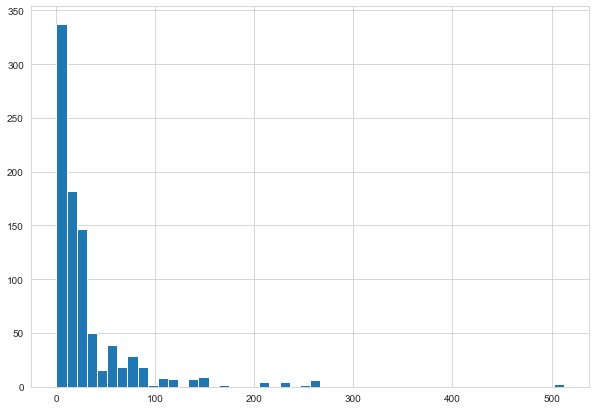

In [12]:
train['Fare'].hist(bins=50, figsize=(10,7))
# be ma neshan midahad bishtare bilit ha beyne 0 ta 50 boode ast

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


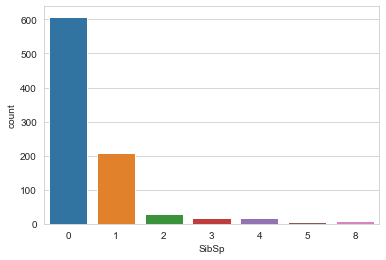

In [14]:
sns.countplot(data=train, x='SibSp');
# yani bishtare mosaferan baradar va khahar nadashtand 

In [15]:
# hamintor ma mitavanim baraye field haye digar niz plot rasm konim va etelaate jame tari dar rabete ba data set peyda konim...

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

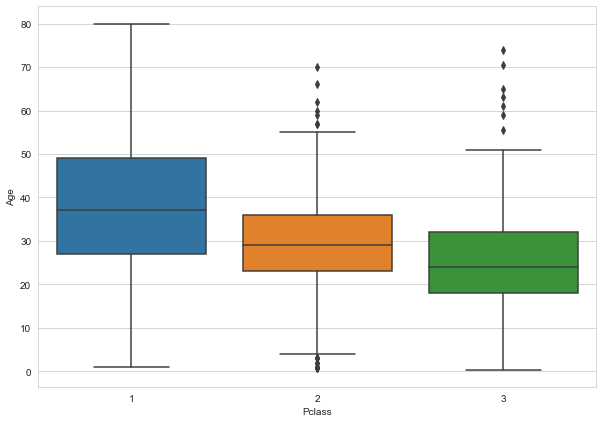

In [17]:
plt.figure(figsize=(10,7)) # baraye tayin size plot bekar grfte mishavad
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [19]:
def impute_age (cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else : 
            return 24
    else : 
        return Age
# in tabe ra ma minevisim ke dar jadval dade hayi ke seneshan sabt nashode ra ba tavajo be inke dar kodam Pclass
# hastand miyangine an class ra barayeshan sabt mikonim, miyangin niz az boxplot haye bala bedast amade ast

In [39]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

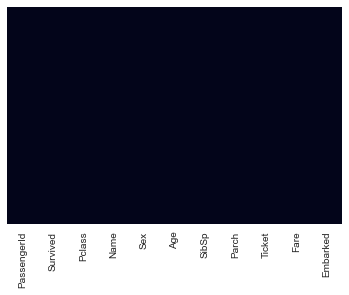

In [45]:
sns.heatmap(train.isnull(), cbar = False, yticklabels=False);
# mibinim ke ba emale func bala tamami miss data haye dar Age az beyn raft 
# ba miyangin senie har Pclassi ke mosafer dar an gharar dashte

In [41]:
train.drop('Cabin', axis=1, inplace=True)
# chon tedade missining data haye col Cabin besiyar bala bood ma azin sotoon sarfe nazar mikonim

In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [46]:
train.dropna(inplace=True)
# in code niz tammami dade hayi ke not available hastand ra drop mikonad, pas ma hich missing value digari ndrim

In [47]:
# TA BE INJA MA MISSING VALUES RO PAK KARDIM YA POR KARDIM IN GHESMATI AZ PROSE CLEAN DATA AST

In [48]:
# HALA MA DADE HAYE CATEGORI TOR RA MIKHAHIM TORI TABDIL KONIM KE BARAYE MASHIN GHABELE FAHM BAHSAD ...

In [49]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [51]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [58]:
train = pd.concat([train, sex, embark], axis=1)

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [60]:
train.drop(['Sex', 'Name', 'Ticket'], axis=1, inplace=True)

In [62]:
train.drop(['Embarked'], axis=1, inplace=True)

In [65]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [64]:
train.drop(['PassengerId'] , axis=1, inplace=True)

In [66]:
# ta be inja ma tavanestim tamami dade hayi ke adadi nabood ro be dade haye adadi tabdil konim 
# va anhara hazf kardim albate sotun hayi ke be analys ma komak nemikardand ham hazf kardim mesle 
# Name , Ticket, Passengerid

In [67]:
# hal be ghesmate train kardan model miresim

In [68]:
X = train.drop(['Survived'], axis = 1)
y = train['Survived']

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
logmodel = LogisticRegression()

In [76]:
logmodel.fit(X_train, y_train)

C:\Users\Nima\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
predictions = logmodel.predict(X_test)

In [78]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [80]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
511,3,24.0,0,0,8.05,1,0,1
613,3,24.0,0,0,7.75,1,1,0
615,2,24.0,1,2,65.00,0,0,1
337,1,41.0,0,0,134.50,0,0,0
718,3,24.0,0,0,15.50,1,1,0


In [ ]:
# finish